Capomulin and Racimine are great at getting tumor growth down in 45 days in mice.  Following tumor growth in five day intervals, these two drugs out of ten where the only drugs that showed a reduced tumor volume.  They also had the highest rate of survival compared to the other drugs.  This trend corelates to the reduced tumor growth.  This positive performance also compares well with the reduced amount of metastatic sites that inevitably showed up for all the mice.  Mice were given placebos.  I dare ask.







## Tumor Response to Treatment

In [91]:

#Dependencies and Setup
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import matplotlib.cm as cm

#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv" 
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

#Read the Mouse and Drug Data and the Clinical Trial Data
Drug_Data = pd.read_csv("data/mouse_drug_data.csv") 
Trial_Data = pd.read_csv("data/clinicaltrial_data.csv")

#Combine the data into a single dataset
drug_trial_complete = pd.merge(Drug_Data, Trial_Data, how ="outer", on=(["Mouse ID", "Mouse ID"]))

#x=drug_trial_complete["Mouse ID"].unique()
#x=pd.DataFrame(x).count()
#x


In [92]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_mean_TV = drug_trial_complete.groupby(["Drug","Timepoint"]).agg(np.mean)
drug_mean_TV = drug_mean_TV.drop(columns=["Metastatic Sites"])
# Convert to DataFrame
drug_mean_TV.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [93]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stand_err_TV = drug_trial_complete.groupby(["Drug","Timepoint"]).sem(ddof = 1)
# Convert to DataFrame
stand_err_TV = stand_err_TV.drop(columns=["Metastatic Sites", "Mouse ID"])
# Preview DataFrame
stand_err_TV.head()
err_bar_TV = stand_err_TV.pivot_table(index = "Timepoint", columns = "Drug")
error_TV= err_bar_TV["Tumor Volume (mm3)"]
error_TV

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [94]:
MTV = drug_mean_TV.reset_index()
MTV.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [95]:
# Minor Data Munging to Re-Format the Data Frames


# Preview that Reformatting worked

tumor = MTV.pivot_table(index = "Timepoint", columns = "Drug")
tum_V = tumor["Tumor Volume (mm3)"]
tum_V

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


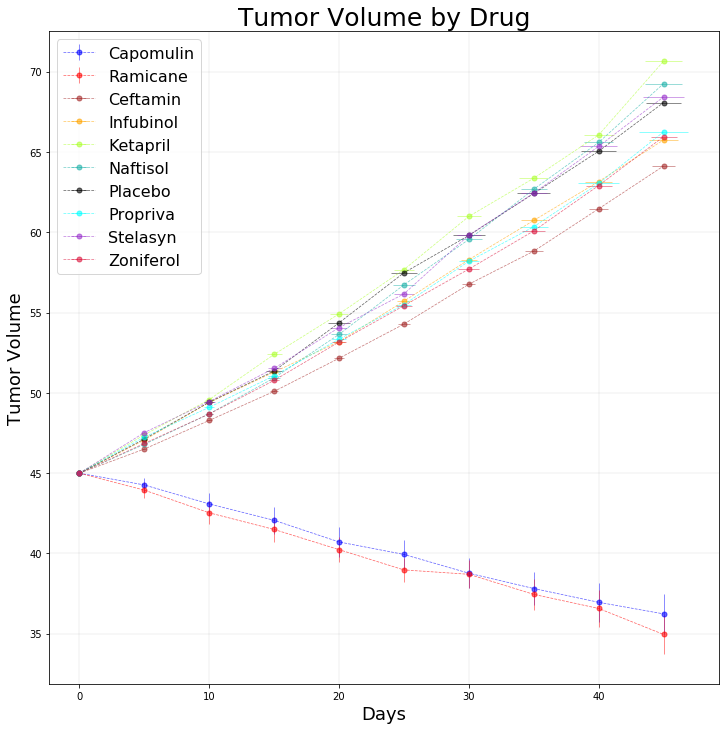

In [96]:

plt.figure(figsize=(12,12))
plt.title('Tumor Volume by Drug', fontsize = 25)
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Tumor Volume', fontsize= 18)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


plt.errorbar(tum_V.index, tum_V["Capomulin"],yerr = error_TV["Capomulin"], 
             fmt='o', color = 'b', alpha = 0.6, label = "Capomulin",
            linestyle="dashed", markersize=5, linewidth=0.75)

plt.errorbar(tum_V.index, tum_V["Ramicane"],yerr = error_TV["Ramicane"], 
             fmt='o', color = 'r', alpha = 0.6, label = "Ramicane",
            linestyle="dashed", markersize=5, linewidth=0.75)

plt.errorbar(tum_V.index, tum_V["Ceftamin"],xerr = error_TV["Ceftamin"], 
             fmt='o', color = 'brown', alpha = 0.6, label = "Ceftamin",
            linestyle="dashed", markersize=5, linewidth=0.75)

plt.errorbar(tum_V.index, tum_V["Infubinol"],xerr = error_TV["Infubinol"], 
             fmt='o', color = 'orange', alpha = 0.6, label = "Infubinol",
            linestyle="dashed", markersize=5, linewidth=0.75)

plt.errorbar(tum_V.index, tum_V["Ketapril"],xerr = error_TV["Ketapril"], 
             fmt='o', color = 'greenyellow', alpha = 0.6, label = "Ketapril",
             linestyle="dashed", markersize=5, linewidth=0.75)

plt.errorbar(tum_V.index, tum_V["Naftisol"],xerr = error_TV["Naftisol"], 
             fmt='o', color = 'lightseagreen', alpha = 0.6, label = "Naftisol",
            linestyle="dashed", markersize=5, linewidth=0.75)

plt.errorbar(tum_V.index, tum_V["Placebo"],xerr = error_TV["Placebo"], 
             fmt='o', color = 'black', alpha = 0.6, label = "Placebo",
            linestyle="dashed", markersize=5, linewidth=0.75)

plt.errorbar(tum_V.index, tum_V["Propriva"],xerr = error_TV["Propriva"], 
             fmt='o', color = 'aqua', alpha = 0.6, label = "Propriva",
            linestyle="dashed", markersize=5, linewidth=0.75)

plt.errorbar(tum_V.index, tum_V["Stelasyn"],xerr = error_TV["Stelasyn"], 
             fmt='o', color = 'darkorchid', alpha = 0.6, label = "Stelasyn",
            linestyle="dashed", markersize=5, linewidth=0.75)

plt.errorbar(tum_V.index, tum_V["Zoniferol"],xerr = error_TV["Zoniferol"], 
             fmt='o', color = 'crimson', alpha = 0.6, label = "Zoniferol",
            linestyle="dashed", markersize=5, linewidth=0.75)


plt.legend(fontsize = 16)
plt.savefig("data/Tumor_Volume_by_Drug.png")

## Metastatic Response to Treatment

In [97]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
drug_mean_meta = drug_trial_complete.groupby(["Drug","Timepoint"]).agg(np.mean)
drug_mean_meta = drug_mean_meta.drop(columns=["Tumor Volume (mm3)"])
# Convert to DataFrame
drug_mean_meta.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [98]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
stand_err_meta = drug_trial_complete.groupby(["Drug","Timepoint"]).sem(ddof = 1)
# Convert to DataFrame

stand_err_meta = stand_err_meta.drop(columns=["Tumor Volume (mm3)", "Mouse ID"])
# Preview DataFrame
err_meta =stand_err_meta.pivot_table(index = "Timepoint", columns = "Drug")
err_meta = err_meta["Metastatic Sites"]

In [99]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
meta = drug_mean_meta.pivot_table(index = "Timepoint", columns = "Drug")
meta = meta["Metastatic Sites"]


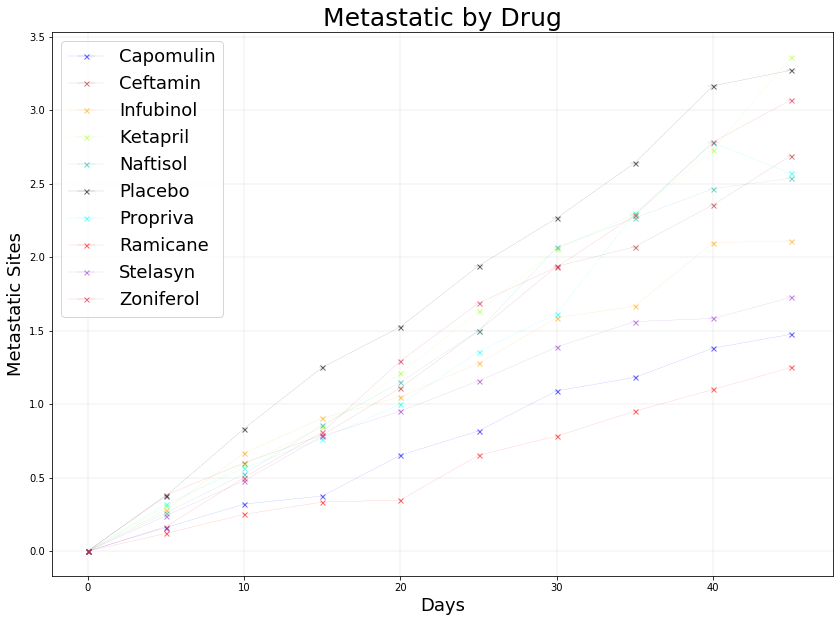

In [100]:
#Generate the Plot (with Error Bars)

#plt.scatter(x_axis_meta, meta, c = colors) plt.figure(figsize=(8,12)) plt.title('Tumor Volume by Drug', fontsize = 25) plt.xlabel('Days', fontsize = 18) plt.ylabel('Tumor Volume', fontsize= 18) plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.figure(figsize=(14,10))
plt.title('Metastatic by Drug', fontsize = 25)
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Metastatic Sites', fontsize= 18)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


plt.errorbar(meta.index, meta["Capomulin"],xerr = err_meta["Capomulin"], fmt='x', color = 'b', 
             alpha = 0.6, label = "Capomulin",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.errorbar(meta.index, meta["Ceftamin"],xerr = err_meta["Ceftamin"], fmt='x',
             color = 'brown', alpha = 0.6, label = "Ceftamin",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.errorbar(meta.index, meta["Infubinol"],xerr = err_meta["Infubinol"], fmt='x',
             color = 'orange', alpha = 0.6, label = "Infubinol",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.errorbar(meta.index, meta["Ketapril"],xerr = err_meta["Ketapril"], fmt='x',
             color = 'greenyellow', alpha = 0.6, label = "Ketapril",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.errorbar(meta.index, meta["Naftisol"],xerr = err_meta["Naftisol"], fmt='x',
             color = 'lightseagreen', alpha = 0.6, label = "Naftisol",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.errorbar(meta.index, meta["Placebo"],xerr = err_meta["Placebo"], fmt='x',
             color = 'black', alpha = 0.6, label = "Placebo",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.errorbar(meta.index, meta["Propriva"],xerr = err_meta["Propriva"], fmt='x',
             color = 'aqua', alpha = 0.6, label = "Propriva",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.errorbar(meta.index, meta["Ramicane"],xerr = err_meta["Ramicane"], fmt='x',
             color = 'r', alpha = 0.6, label = "Ramicane",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.errorbar(meta.index, meta["Stelasyn"],xerr = err_meta["Stelasyn"], fmt='x',
             color = 'darkorchid', alpha = 0.6, label = "Stelasyn",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.errorbar(meta.index, meta["Zoniferol"],xerr = err_meta["Zoniferol"], fmt='x',
             color = 'crimson', alpha = 0.6, label = "Zoniferol",
            linestyle="dashed", markersize=5, linewidth=0.20)

plt.legend(fontsize = 18) 
plt.savefig("data/Metastatic_by_Drug.png")



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [101]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#mouse_count = drug_trial_complete.groupby(["Drug","Timepoint"]).agg(np.median)

# Preview DataFrame
mouse_count = drug_trial_complete.groupby(["Drug","Timepoint"]).agg("Mouse ID")
mc = mouse_count.describe()
mc = mc.drop(columns=["unique", "top", "freq"])
mc3 = mc['count'].astype(int)
mc3 = pd.DataFrame(mc3)
mc2 = mc3.pivot_table(index = "Timepoint", columns = "Drug")
mc2 = mc2["count"]
mc2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [102]:
mouse_end = mc2.iloc[9,:]
mouse_start = mc2.iloc[0,:]
survival_rate = (mouse_end/mouse_start)*100
survival_rate = pd.DataFrame(survival_rate)
survival_rate

,0
Drug,
Capomulin,84.000000
Ceftamin,52.000000
Infubinol,36.000000
Ketapril,44.000000
Naftisol,52.000000
Placebo,44.000000
Propriva,26.923077
Ramicane,80.000000
Stelasyn,42.307692


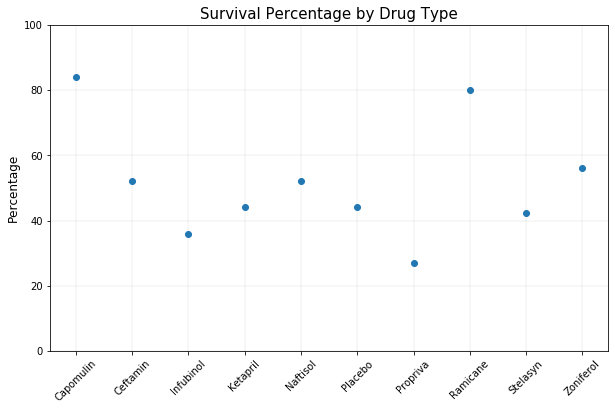

<Figure size 432x288 with 0 Axes>

In [103]:
# Minor Data Munging to Re-Format the Data Frames
plt.figure(figsize=(10,6))
x_axis =  mc2.columns
y_axis = survival_rate.iloc[:,0]

plt.scatter(x_axis, y_axis)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.xticks(x_axis, rotation=45)
plt.ylim(0, max(y_axis)+16)
plt.title("Survival Percentage by Drug Type", fontsize = 15)
plt.ylabel("Percentage", fontsize=12)

plt.show()
plt.savefig("data/Survival_rate.png")
# Preview the Data Frame


In [104]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
x_axis

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [105]:
# Calculate the percent changes for each drug
this = tum_V.iloc[0,:] - tum_V.iloc[9,:]
change_percent = (this/tum_V.iloc[0,:])*-100
#change_percent = change_percent.astype(int)
# Store all Relevant Percent Changes into a Tuple
#change_percent = change_percent.values
#change_percent = pd.Series(change_percent)

change_percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [106]:

#passing_drug = []
#passing_value = []
#failing_drug = []
#failing_value= []

#for j,stuff in change_percent:
    #if stuff > 0 :
        #failing_drug = stuff
        #failing_drug.append(stuff)
        #failing_value.append(j)
    #else :
        #passing_drug = stuff
        #passing_drug.append(stuff)
        #passing_value.append(j)


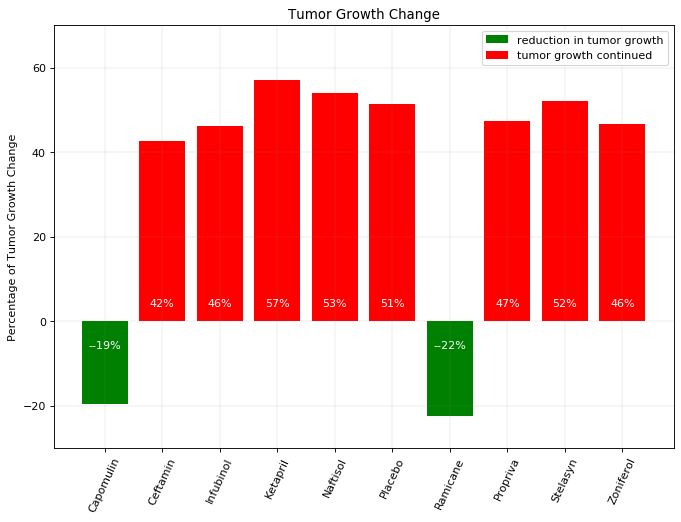

In [107]:

fig, ax = plt.subplots(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
width = .8
xs = x_axis.values
xs = pd.Series(xs)
xs
indi = xs

rectsPass = ax.bar(indi[0], change_percent[0], width, color='green', label = "reduction in tumor growth")
rectsFail = ax.bar(indi[1], change_percent[1], width, color='red', label = "tumor growth continued")
rectsFail2 = ax.bar(indi[2], change_percent[2], width, color='red')
rectsFail3 = ax.bar(indi[3], change_percent[3], width, color='red')
rectsFail4 = ax.bar(indi[4], change_percent[4], width, color='red')
rectsFail5 = ax.bar(indi[5], change_percent[5], width, color='red')
rectsPass2 = ax.bar(indi[7], change_percent[7], width, color = 'green')
rectsFail6 = ax.bar(indi[6], change_percent[6], width, color='red')
rectsFail7 = ax.bar(indi[8], change_percent[8], width, color='red')
rectsFail8 = ax.bar(indi[9], change_percent[9], width, color='red')


# Orient widths. Add labels, tick marks, etc.
plt.ylabel('Percentage of Tumor Growth Change')
plt.title('Tumor Growth Change')
plt.xticks(xs, rotation = 65)
plt.ylim([-30,70])
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend()
# Use functions to label the percentages of changes
def labelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def labelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -7,
                '-%d%%' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
labelPass(rectsPass)
labelPass(rectsPass2)
labelFail(rectsFail)
labelFail(rectsFail2)
labelFail(rectsFail3)
labelFail(rectsFail4)
labelFail(rectsFail5)
labelFail(rectsFail6)
labelFail(rectsFail7)
labelFail(rectsFail8)
# Save the Figure

plt.savefig("data/Tumor_Volume_Perc_Change.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)